In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape to (samples, 28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax") # 10 classes
])

In [33]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.8060 - loss: 0.5420
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.8748 - loss: 0.3534
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.8895 - loss: 0.3067
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.8999 - loss: 0.2771
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9082 - loss: 0.2507
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9155 - loss: 0.2310
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9207 - loss: 0.2130
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9277 - loss: 0.1962
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9325 - loss: 0.1832
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9377 - loss: 0.1687


In [34]:
model.save("./models/cnn_model.keras")

Test Accuracy: 91.21%


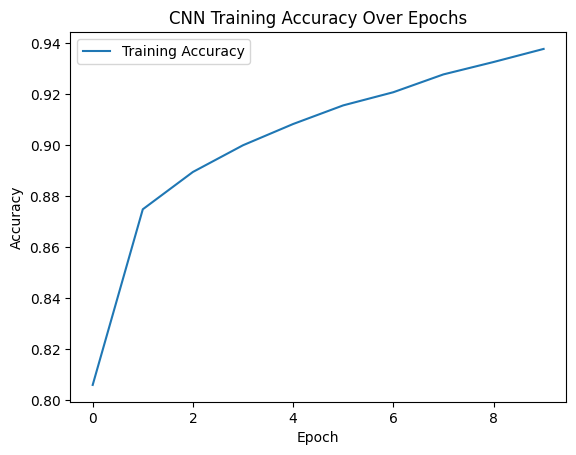

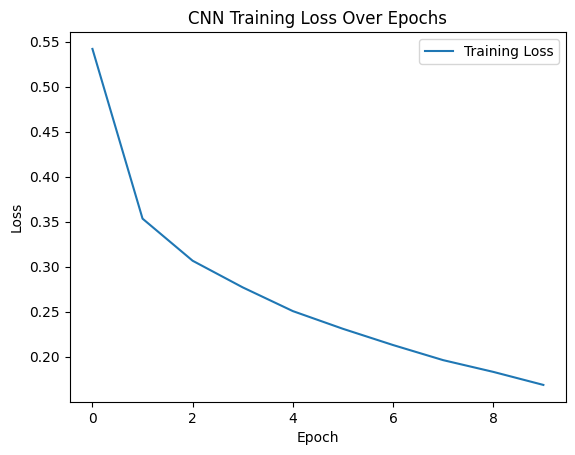

In [35]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("CNN Training Accuracy Over Epochs")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CNN Training Loss Over Epochs")
plt.legend()
plt.show()